In [1]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
#haha

oxford = rasterio.open("data/Oxford.tif")
central_park = rasterio.open("data/CentralPark.tif")

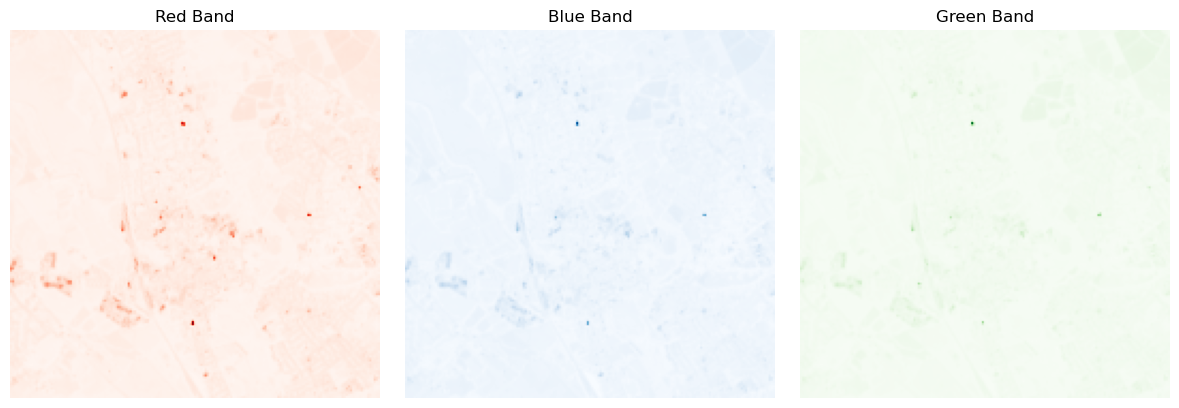

In [2]:
oxford_np = oxford.read()
data_min = oxford_np.min()
data_max = oxford_np.max()

# Normalize to [0, 1] 
normalized_data = ((oxford_np - data_min) / (data_max - data_min)) 

fig, ax = plt.subplots(1, 3, figsize=(12, 4))
cmaps = ["Reds", "Blues", "Greens"]
bands = ["Red Band", "Blue Band", "Green Band"]
for band in [3, 2, 1]:
    ax[band-1].imshow(normalized_data[band, :, :], cmap=cmaps[band-1])
    ax[band-1].set_title(bands[band-1])
    ax[band-1].axis("off")
plt.tight_layout();

In [3]:
def scale_to_8bit(image, lower_percent=1, upper_percent=99):
    # Calculate the percentiles to stretch
    min_val = np.percentile(image, lower_percent)
    max_val = np.percentile(image, upper_percent)

    # Apply the linear stretch
    stretched_img = np.clip(image, min_val, max_val)

    # Scale values to 0-255
    scaled_img = ((stretched_img - min_val) / (max_val - min_val)) * 255.0
    scaled_img = scaled_img.astype(np.uint8)  # Convert to 8-bit values

    return scaled_img

def visualize(imagery):
    red_band = imagery.read(4)
    green_band = imagery.read(3)
    blue_band = imagery.read(2)

    scaled_red = scale_to_8bit(red_band)
    scaled_green = scale_to_8bit(green_band)
    scaled_blue = scale_to_8bit(blue_band)

    # Combine the scaled bands into a single RGB image
    rgb_image = np.stack((scaled_red, scaled_green, scaled_blue), axis=-1)

    plt.figure(figsize=(5, 5))
    plt.imshow(rgb_image)
    plt.axis("off")
    plt.title("All bands")

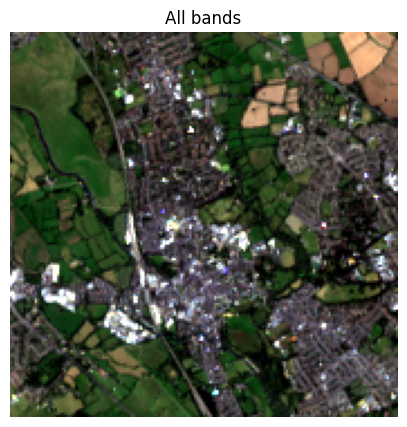

In [4]:
visualize(oxford)

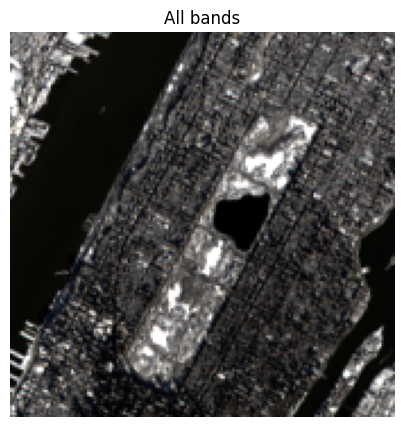

In [5]:
visualize(central_park)

In [ ]:
../imagery/ET2000L7/ET200000000001-953105852336.tif

Total bands: 15


/tmp/ipykernel_2266584/3763256014.py:9: RuntimeWarning: invalid value encountered in divide
  scaled_img = ((stretched_img - min_val) / (max_val - min_val)) * 255.0
/tmp/ipykernel_2266584/3763256014.py:10: RuntimeWarning: invalid value encountered in cast
  return scaled_img.astype(np.uint8)


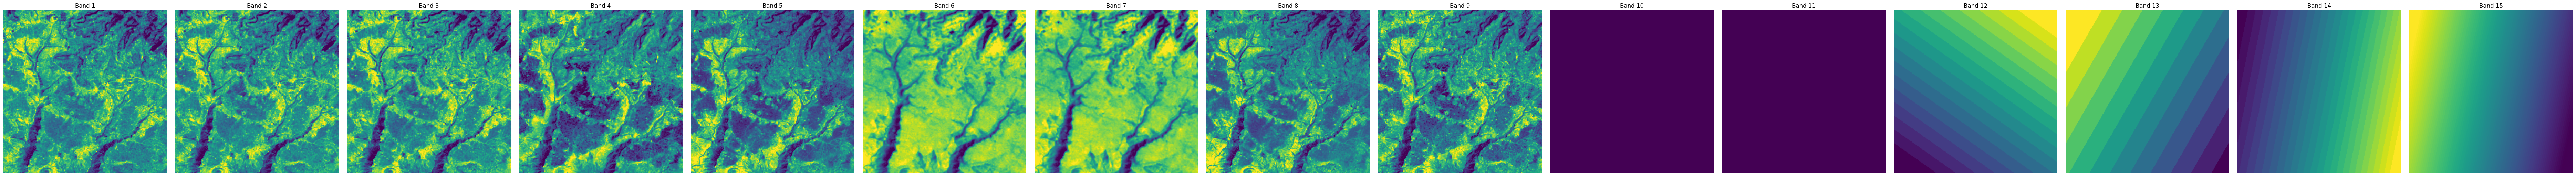

In [42]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

def scale_to_8bit(image, lower_percent=1, upper_percent=99):
    min_val = np.percentile(image, lower_percent)
    max_val = np.percentile(image, upper_percent)
    stretched_img = np.clip(image, min_val, max_val)
    scaled_img = ((stretched_img - min_val) / (max_val - min_val)) * 255.0
    return scaled_img.astype(np.uint8)


# Function to normalize the pixel values to the range 0-255
def normalize(array):
    array_min, array_max = 0, 3000
    normalized = ((array - array_min) / (array_max - array_min) * 255).astype(np.float32)
    # return (array/1000).astype(np.uint8)
    # Clip values to the specified range (0-255 by default)
    return np.clip(normalized, 0, 255).astype(np.uint8)

# Load .tif image
with rasterio.open("../imagery/ET2000L7/ET200000000001-953105852336.tif") as src:
    band_count = src.count
    print(f"Total bands: {band_count}")
    
    fig, axes = plt.subplots(1, band_count, figsize=(5 * band_count, 5))
    if band_count == 1:
        axes = [axes]

    for i in range(1, band_count + 1):
        band = src.read(i)
        band_8bit = scale_to_8bit(band)
        axes[i-1].imshow(band_8bit)
        axes[i-1].set_title(f'Band {i}')
        axes[i-1].axis('off')

    plt.tight_layout()
    plt.show()


Total bands: 17


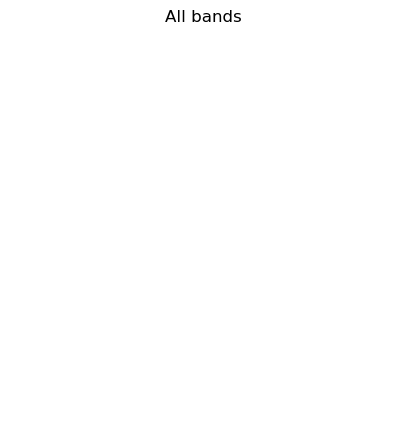

In [54]:
# data/CentralPark.tif
# data/Oxford.tif
# ../imagery/ET2000L7/ET200000000001-953105852336.tif
# ../imagery/ET2016L8/ET201600000001-1453793262739.tif
with rasterio.open("../imagery/ET2016L8/ET201600000001-1453793262739.tif") as src:

    band_count = src.count
    print(f"Total bands: {band_count}")
    
    image_list = []
    include = [4,3,2]
    land_mois = [7,4,2]
    agri = [6,5,4]

    for i in agri:
        image_list.append(scale_to_8bit(src.read(i)))
    image = np.stack(image_list, axis=-1)
    
    plt.figure(figsize=(5, 5))
    plt.imshow(image)
    plt.axis("off")
    plt.title("All bands")